In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.express as px
import seaborn as sns

In [45]:
df = pd.read_csv("Customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Data Cleaning

In [47]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## finding null values

In [48]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

there are 11 rows with no monthly charges. we will be removing them from our dataset

In [49]:
df.dropna(inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

there are no more rows with null data from this point onwards

## changing column to the correct datatype

perform label encoding on dataset for machine learning

In [29]:
# predictor variable CHURN. yes = 1, no = 0
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# gender. Female = 1, male = 0
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Female' else 0)

# Partner. yes = 1, no = 0
df['Partner'] = df['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)

# Dependents. yes = 1, no = 0
df['Dependents'] = df['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)

# phone service.  yes = 1, no = 0
df['PhoneService'] = df['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)

# multiple lines. no phone service = 2, yes = 1, no = 0
df['MultipleLines'] = df['MultipleLines'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else 2))

# InternetService. Fibre optic = 2, dsl = 1, no = 0
df['InternetService'] = df['InternetService'].apply(lambda x: 1 if x == 'DSL' else (0 if x == 'No' else 2))

# OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies No internet service = 2, yes = 1, no = 0
df['OnlineSecurity'] = df['OnlineSecurity'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else 2))
df['OnlineBackup'] = df['OnlineBackup'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else 2))
df['DeviceProtection'] = df['DeviceProtection'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else 2))
df['TechSupport'] = df['TechSupport'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else 2))
df['StreamingTV'] = df['StreamingTV'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else 2))
df['StreamingMovies'] = df['StreamingMovies'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else 2))

# Contract. two year = 2, one year = 1, month-to-month = 0
df['Contract'] = df['Contract'].apply(lambda x: 1 if x == 'One year' else (0 if x == 'Month-to-month' else 2))

# PaperlessBilling. yes = 1, no = 0
df['PaperlessBilling'] = df['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)

# PaymentMethod Electronic check = 3, Mailed check = 2, Bank transfer (automatic) = 1, Credit card (automatic) = 0
payment_mapping = {'Electronic check': 3, 'Mailed check': 2, 'Bank transfer (automatic)': 1, 'Credit card (automatic)': 0}
df['PaymentMethod'] = df['PaymentMethod'].map(payment_mapping)


In [31]:
len(df)

7032

## removing duplicated data

In [50]:
# use customer_id to identify duplicates and remove data
df.drop_duplicates(subset=['customerID'], inplace=True)
len(df)

7032

no duplicated data found

## finding outliers in data

In [51]:
df.describe()[['tenure', 'MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
fig = px.box(df, y='tenure')

fig.show()

In [ ]:
fig = px.box(df, y='MonthlyCharges')

fig.show()

In [ ]:
fig = px.box(df, y='TotalCharges')

fig.show()

no apparent outliers to remove. 

# EDA

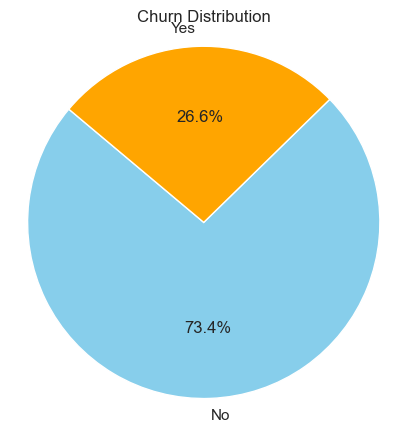

In [67]:
# finding distribution of churn vs non churn
churn_counts = df['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


There are about 26.6% of customers who churned and 73.4% who did not churn. We will further break it down into the different categories to further explore the distributions of churn vs non churn customers.
There is an imbalance of non churn to churn customers which suggests that the dataset is highly imbalanced. We will not be removing non churn customers.


### Churn vs Gender

In [ ]:
# finding distribution of churn vs non churn differentiated by gender
churn_colors = {'Yes': 'orange', 'No': 'skyblue'}

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="gender", hue="Churn", data=df, palette=churn_colors)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

# Add labels and a title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Churn Distribution by Gender")

# Show the plot
plt.show()

We conducted an analysis of the correlation between gender and churn patterns, revealing that the proportion of females to males among both churning and non-churning customers closely mirrors the distribution observed in the entire population. This resemblance in churn rates implies that gender does not appear to have a significant impact on customer attrition.

### Churn vs Senior Citizen

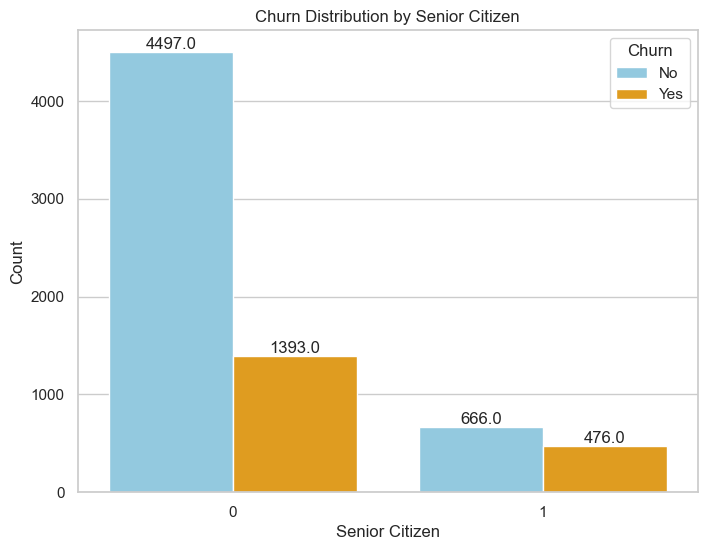

In [71]:
# finding distribution of churn vs non churn differentiated by Senior Citizen
churn_colors = {'Yes': 'orange', 'No': 'skyblue'}

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="SeniorCitizen", hue="Churn", data=df, palette=churn_colors)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

# Add labels and a title
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.title("Churn Distribution by Senior Citizen")

# Show the plot
plt.show()

`SeniorCitizen` = 0 represents not senior citizen.<br>
`SeniorCitizen` = 1 represents senior citizen.<br>
The demographic distribution indicates a prevalence of non-senior citizens over senior citizens. The churn analysis reveals a comparatively lower churn rate among non-senior citizens, as compared with a significantly lower churn rate observed within the senior citizen segment.

### Churn vs Partner
Whether the customer has a partner or not (Yes, No)

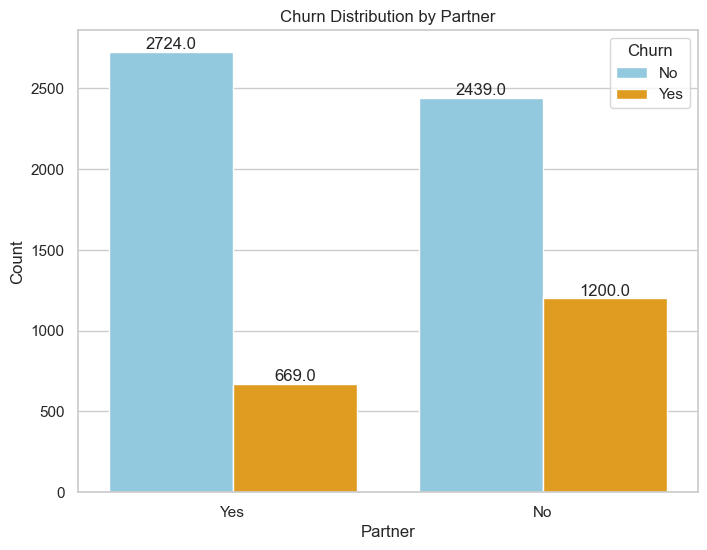

In [72]:
#finding distribution of churn vs non churn differentiated by Partner


# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="Partner", hue="Churn", data=df, palette=churn_colors)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

# Add labels and a title
plt.xlabel("Partner")
plt.ylabel("Count")
plt.title("Churn Distribution by Partner")

# Show the plot
plt.show()

The demographic shows that there is a higher churn rate for customers who do not have partners as compared to those who have partners.

### Churn vs Multiple Lines

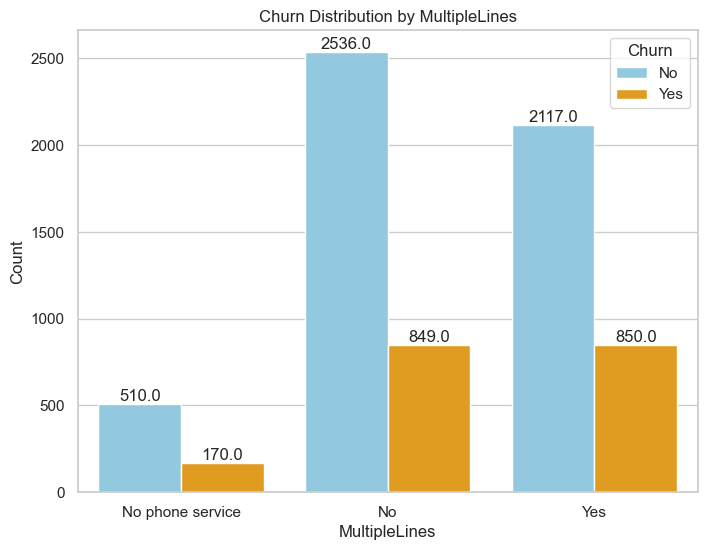

In [74]:
#finding distribution of churn vs non churn differentiated by Multiple Lines

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="MultipleLines", hue="Churn", data=df, palette=churn_colors)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

# Add labels and a title
plt.xlabel("MultipleLines")
plt.ylabel("Count")
plt.title("Churn Distribution by MultipleLines")

# Show the plot
plt.show()

### Churn vs Internet Service

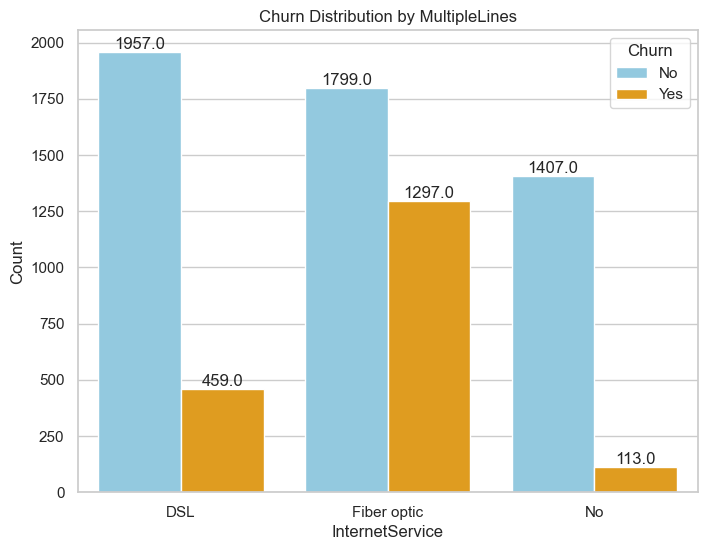

In [75]:
#finding distribution of churn vs non churn differentiated by Internet Service

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="InternetService", hue="Churn", data=df, palette=churn_colors)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

# Add labels and a title
plt.xlabel("InternetService")
plt.ylabel("Count")
plt.title("Churn Distribution by MultipleLines")

# Show the plot
plt.show()

### Churn vs Contract

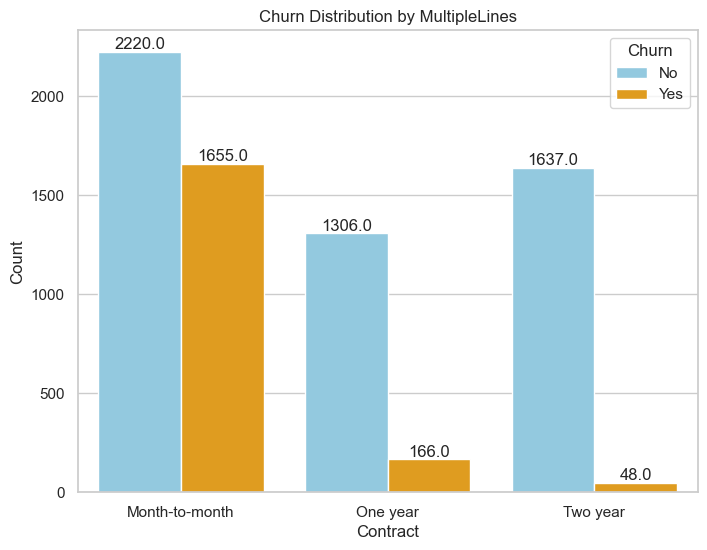

In [76]:
#finding distribution of churn vs non churn differentiated by Contract

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="Contract", hue="Churn", data=df, palette=churn_colors)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

# Add labels and a title
plt.xlabel("Contract")
plt.ylabel("Count")
plt.title("Churn Distribution by MultipleLines")

# Show the plot
plt.show()

### Churn vs PaperlessBilling

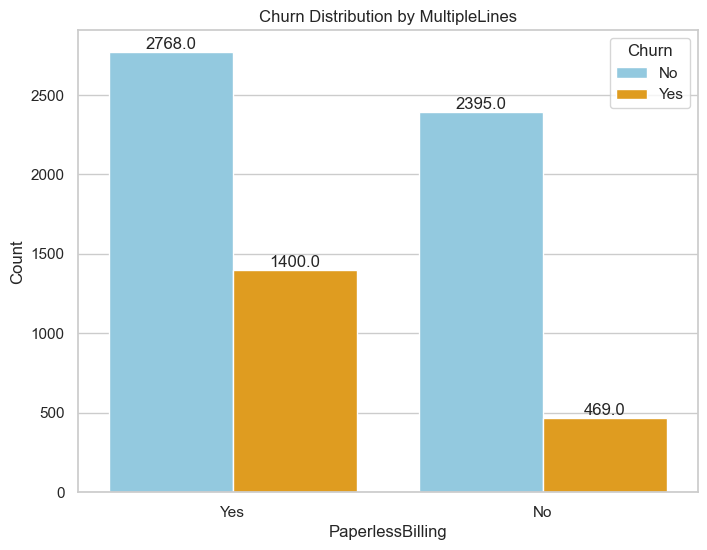

In [77]:
#finding distribution of churn vs non churn differentiated by Paperless Billing

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="PaperlessBilling", hue="Churn", data=df, palette=churn_colors)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

# Add labels and a title
plt.xlabel("PaperlessBilling")
plt.ylabel("Count")
plt.title("Churn Distribution by MultipleLines")

# Show the plot
plt.show()

### Churn vs PaymentMethod

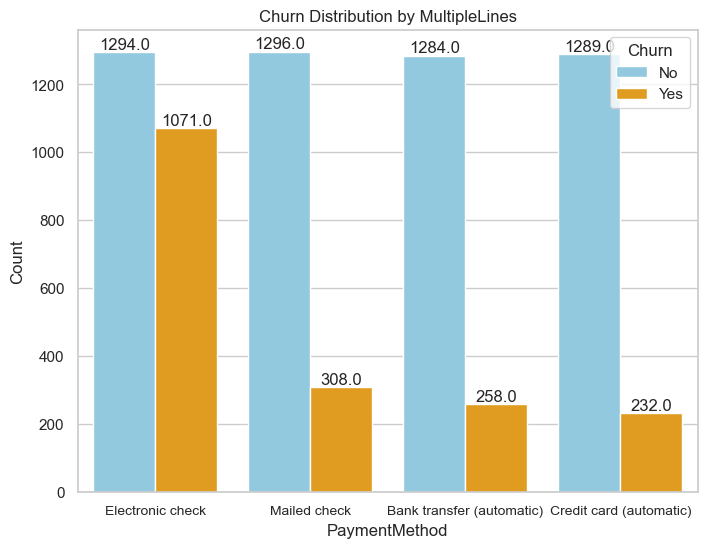

In [82]:
#finding distribution of churn vs non churn differentiated by Payment Method
# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="PaymentMethod", hue="Churn", data=df, palette=churn_colors)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')
plt.xticks(fontsize=10)
# Add labels and a title
plt.xlabel("PaymentMethod")
plt.ylabel("Count")
plt.title("Churn Distribution by MultipleLines")

# Show the plot
plt.show()

### Churn vs Tenure
finding the trend of churned customers and how long they have stayed until they churned

In [83]:
df_churn = df[df['Churn'] == "Yes"]
df_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


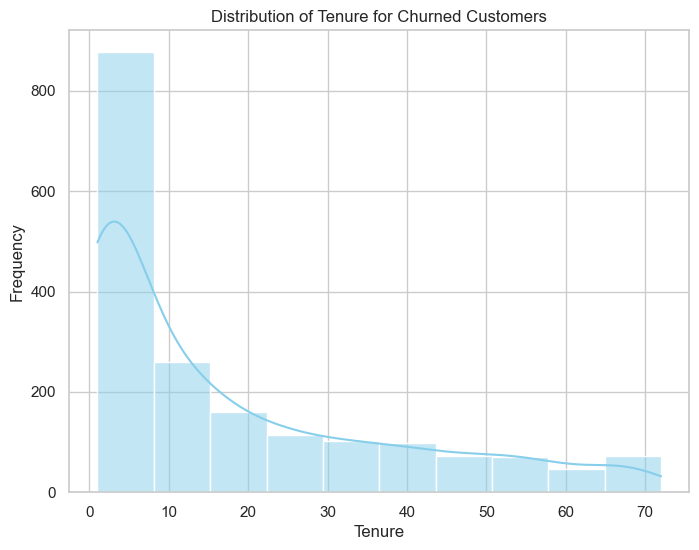

In [93]:
plt.figure(figsize=(8, 6))
sns.histplot(df_churn['tenure'], bins=10, kde=True, color='skyblue')

# Add labels and a title
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.title("Distribution of Tenure for Churned Customers")

# Show the plot
plt.show()


### Churn vs Charges
finding out churned customers and their charges with the company

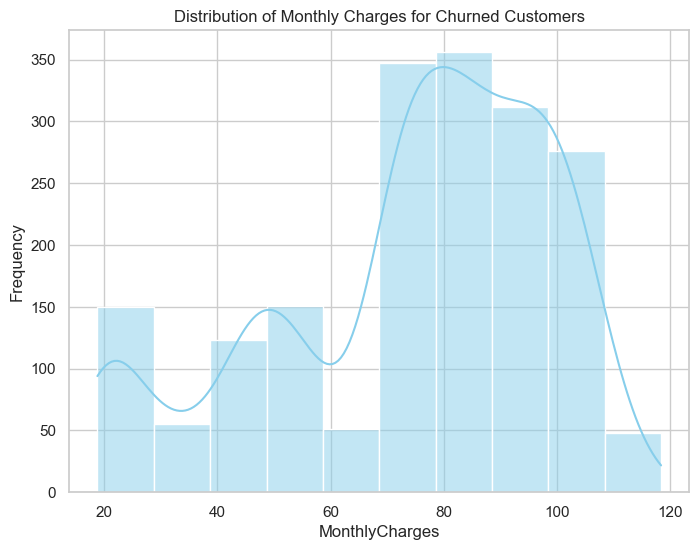

In [92]:
plt.figure(figsize=(8, 6))
sns.histplot(df_churn['MonthlyCharges'], bins=10, kde=True, color='skyblue')

# Add labels and a title
plt.xlabel("MonthlyCharges")
plt.ylabel("Frequency")
plt.title("Distribution of Monthly Charges for Churned Customers")

# Show the plot
plt.show()


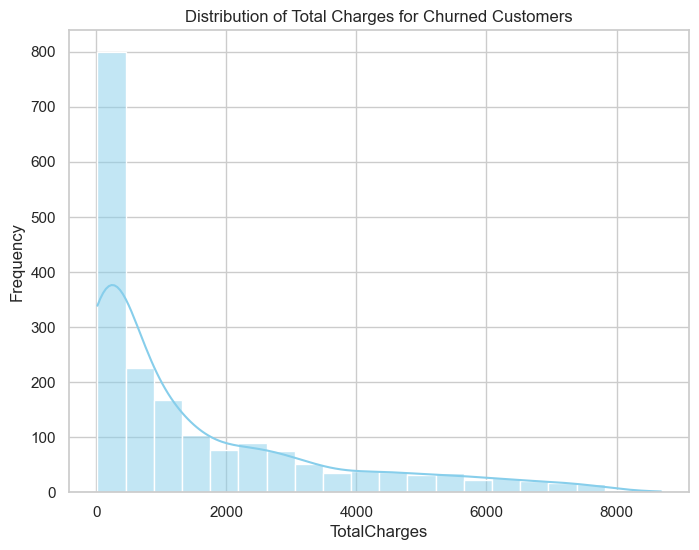

In [96]:
plt.figure(figsize=(8, 6))
sns.histplot(df_churn['TotalCharges'], bins=20, kde=True, color='skyblue')

# Add labels and a title
plt.xlabel("TotalCharges")
plt.ylabel("Frequency")
plt.title("Distribution of Total Charges for Churned Customers")

# Show the plot
plt.show()
